<font size="6" color='red'>Rotor design and energy produciton forecasting over a year</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sympy import *

<font size="6" color='red'>Question 1</font>

In [2]:
blade_number = 3

<font size="5" color='blue'>Reading of CL data</font>

In [3]:
cl = pd.read_csv('data/CL-NACA18.txt',  delimiter=r"\s+", index_col=0)
print (cl)

        R=1e4   R=2e4   R=4e4   R=8e4  R=1.6e5  R=3.6e5   R=7e5   R=1e6  \
alpha                                                                     
0      0.0000  0.0000  0.0000  0.0000   0.0000   0.0000  0.0000  0.0000   
1     -0.0045  0.0607  0.0936  0.0889   0.1100   0.1100  0.1100  0.1100   
2     -0.0154  0.1135  0.1833  0.1935   0.2200   0.2200  0.2200  0.2200   
3     -0.0233  0.1550  0.2688  0.2924   0.3088   0.3300  0.3300  0.3300   
4     -0.0368  0.1788  0.3495  0.3880   0.4114   0.4400  0.4400  0.4400   
5     -0.0577  0.1788  0.4117  0.4753   0.5068   0.5240  0.5500  0.5500   
6     -0.0839  0.1582  0.4573  0.5615   0.5960   0.6228  0.6328  0.6600   
7     -0.1182  0.1161  0.4768  0.6224   0.6724   0.7100  0.7291  0.7362   
8     -0.1501  0.0214  0.4428  0.6589   0.7373   0.7879  0.8156  0.8256   
9     -0.1584 -0.0682  0.3544  0.6606   0.7781   0.8526  0.8904  0.9067   
10    -0.1423 -0.1003  0.2108  0.6248   0.7949   0.8983  0.9541  0.9755   
11    -0.1095 -0.0812  0.

<font size="5" color='blue'>Plot of CL data</font>

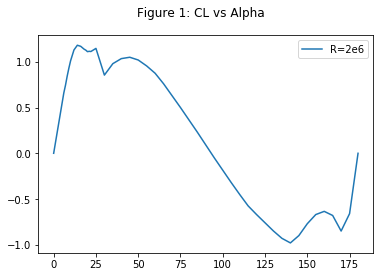

In [4]:
plt.figure()
plt.plot(cl["R=2e6"])
plt.suptitle("Figure 1: CL vs Alpha")
plt.legend()
plt.savefig('imgs/CL.png')
plt.show()

<font size="5" color='blue'>Reading of CD data</font>

In [5]:
cd = pd.read_csv('data/CD-NACA18_OK.txt',  delimiter=r"\s+", index_col=0)
print (cd)

        R=1e4   R=2e4   R=4e4   R=8e4  R=1.6e5  R=3.6e5   R=7e5   R=1e6  \
alpha                                                                     
0      0.0385  0.0286  0.0214  0.0162   0.0128   0.0101  0.0085  0.0082   
1      0.0387  0.0288  0.0215  0.0163   0.0129   0.0102  0.0087  0.0082   
2      0.0391  0.0292  0.0219  0.0167   0.0131   0.0104  0.0088  0.0083   
3      0.0399  0.0299  0.0225  0.0172   0.0137   0.0107  0.0091  0.0086   
4      0.0410  0.0310  0.0235  0.0181   0.0144   0.0112  0.0096  0.0089   
5      0.0425  0.0323  0.0247  0.0192   0.0153   0.0121  0.0102  0.0095   
6      0.0443  0.0339  0.0263  0.0206   0.0166   0.0132  0.0112  0.0102   
7      0.0463  0.0358  0.0282  0.0223   0.0181   0.0145  0.0123  0.0115   
8      0.0489  0.0376  0.0303  0.0242   0.0198   0.0159  0.0136  0.0126   
9      0.0525  0.0396  0.0327  0.0264   0.0217   0.0176  0.0150  0.0139   
10     0.0574  0.0630  0.0620  0.0288   0.0238   0.0194  0.0166  0.0154   
11     0.0902  0.0930  0.

<font size="5" color='blue'>Plot of CD data</font>

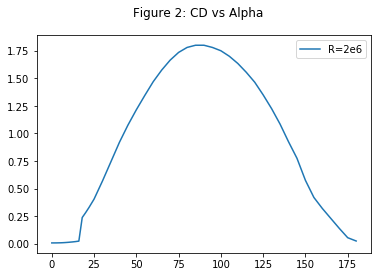

In [6]:
plt.figure()
plt.plot(cd["R=2e6"])
plt.suptitle("Figure 2: CD vs Alpha")
plt.legend()
plt.savefig('imgs/CD.png')
plt.show()

<font size="5" color='blue'>Plot of CL/CD</font>

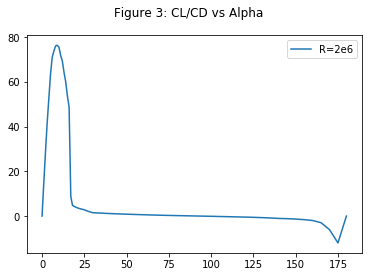

In [7]:
div = cl["R=2e6"] / cd["R=2e6"]
plt.figure()
plt.plot(div)
plt.suptitle("Figure 3: CL/CD vs Alpha")
plt.legend()
plt.savefig('imgs/CL_CD.png')
plt.show()

<font size="6" color='yellow'>Analysis 0°-25°</font>

<font size="5" color='blue'>Plot of CL 0°-25°</font>

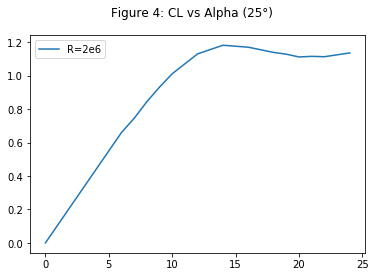

In [8]:
plt.figure()
plt.plot(cl["R=2e6"][0:25])
plt.suptitle("Figure 4: CL vs Alpha (25°)")
plt.legend()
plt.savefig('imgs/CL_25.png')
plt.show()

<font size="5" color='blue'>Plot of CD 0°-25°</font>

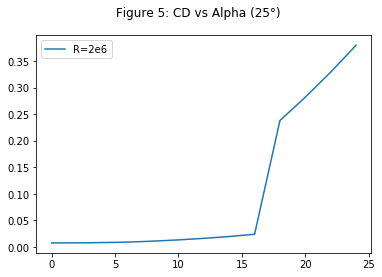

In [9]:
plt.figure()
plt.plot(cd["R=2e6"][0:25])
plt.suptitle("Figure 5: CD vs Alpha (25°)")
plt.legend()
plt.savefig('imgs/CD_25.png')
plt.show()

<font size="5" color='blue'>Plot of CL/CD 0°-25°</font>

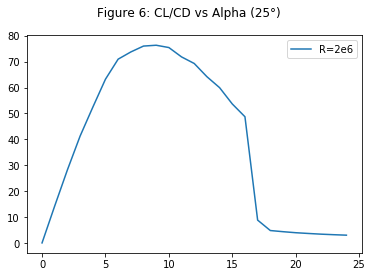

In [10]:
plt.figure()
plt.plot(div[0:25])
plt.suptitle("Figure 6: CL/CD vs Alpha (25°)")
plt.legend()
plt.savefig('imgs/CL_CD_25.png')
plt.show()

<font size="6" color='red'>Question 2</font>

<font size="5" color='green'>Alpha Stall</font>,<font size="5" color='red'> Alpha Max</font>,<font size="5" color='yellow'> Alpha DeepStall</font>

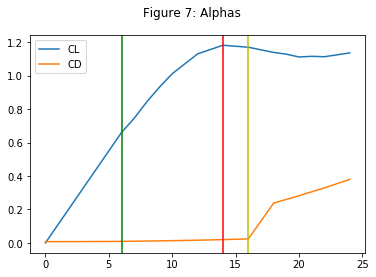

Alpha Stall =  6
Alpha Max =  14
Alpha Deep Stall =  16


In [11]:
plt.plot(cl["R=2e6"][0:25], label="CL")
plt.plot(cd["R=2e6"][0:25],label="CD")
plt.axvline(x=6, color='g') #cl stops being linear
plt.axvline(x=cl["R=2e6"][0:25].idxmax(), color='r') #cl max vlaue
plt.axvline(x=16, color='y') #cd sudden change 
plt.suptitle("Figure 7: Alphas")
plt.legend()
plt.savefig('imgs/alphas.png')
plt.show()
print("Alpha Stall = ",6)
print("Alpha Max = ",cl["R=2e6"][0:25].idxmax())
print("Alpha Deep Stall = ",16)
alpha_deep_stall = 16

<font size="6" color='red'>Question 3</font>

<font size="5" color='blue'>Best Angle lift to drag ratio</font>

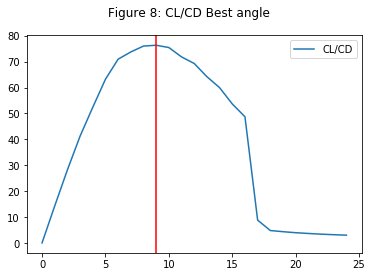

best angle = 9


In [12]:
plt.plot(div[0:25], label="CL/CD")
plt.axvline(x=div.idxmax(), color='r') #cd/cl max vlaue
plt.suptitle("Figure 8: CL/CD Best angle")
plt.legend()
plt.savefig('imgs/best_angle.png')
plt.show()

best_angle = div[0:25].idxmax()
print("best angle =", best_angle)

<font size="6" color='red'>Question 4</font>

<font size="5" color='blue'>CL,CD, CL/CD for Best Angle</font>

In [13]:
cl_best_angle = cl["R=2e6"][best_angle]
cd_best_angle = cd["R=2e6"][best_angle]
cl_cd_best_angle = div[best_angle]
print("CL(at best angle) =", cl_best_angle)
print("CD(at best angle) =", cd_best_angle)
print("CL/CD(at best angle) =", cl_cd_best_angle)

CL(at best angle) = 0.9314
CD(at best angle) = 0.0122
CL/CD(at best angle) = 76.34426229508196


<font size="6" color='red'>Question 5</font>

<font size="5" color='blue'>r/R</font>

In [14]:
slice_radius = .05
ratio_array = [.075]
for i in range(18):
    ratio_array.append(ratio_array[-1]+slice_radius)
df_ratio = pd.DataFrame(ratio_array, columns=['R'])
df_ratio.index += 1 
df_ratio.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
R,0.075,0.125,0.175,0.225,0.275,0.325,0.375,0.425,0.475,0.525,0.575,0.625,0.675,0.725,0.775,0.825,0.875,0.925,0.975


<font size="6" color='red'>Question 6</font>

<font size="5" color='blue'>Lambda</font>

In [15]:
def landa(landaR,ratio):
    return landaR*ratio

In [16]:
b, l, a, bp = symbols('b l a bp')

<font size="5" color='blue'>Beta</font>

In [17]:
expr = tan(b)-(2/(3*l))
solve(expr, b)

[atan(2/(3*l))]

In [18]:
def beta(landa):
    return math.degrees(atan(2/(3*landa)))

<font size="5" color='blue'>Beta pitch</font>

In [19]:
expr = b - a - bp
solve(expr, bp)

[-a + b]

In [20]:
def beta_pitch(alpha,beta):
    return (-alpha + beta)

<font size="5" color='blue'>C/R</font>

In [21]:
def c_r(ratio,cl,cd,landa):
    return (1/(cl*blade_number))*((16*math.pi*ratio)/(9*math.sqrt(landa**2+4/9)*(landa+(2/3)*(cd/cl))))

<font size="5" color='blue'>Tables</font>

In [22]:
def df_landa(landa_value):
    d={}
    d["df{0}".format(landa_value)] = pd.DataFrame(ratio_array, columns=["r/R"])
    d["df{0}".format(landa_value)].set_index('r/R', inplace=True)
    
    #landa
    d["landa_{0}".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}".format(landa_value)].append(landa(landa_value,ratio_array[i]))
    d["df{0}".format(landa_value)]["landa_{0}".format(landa_value)] = d["landa_{0}".format(landa_value)]
    
    #beta
    d["landa_{0}_beta".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_beta".format(landa_value)].append(beta(d["landa_{0}".format(landa_value)][i]))
    d["df{0}".format(landa_value)]["beta_{0}".format(landa_value)] = d["landa_{0}_beta".format(landa_value)]
    
    #alpha
    alpha = best_angle
    d["landa_{0}_alpha".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_alpha".format(landa_value)].append(alpha)
    d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)] = d["landa_{0}_alpha".format(landa_value)]
    
    #betapitch
    d["landa_{0}_beta_pitch".format(landa_value)] = []
    for i in range(len(ratio_array)):
        d["landa_{0}_beta_pitch".format(landa_value)].append(beta_pitch(d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["beta_{0}".format(landa_value)].tolist()[i]))
    d["df{0}".format(landa_value)]["beta_pitch_{0}".format(landa_value)] = d["landa_{0}_beta_pitch".format(landa_value)]
    
    #cl
    d["landa_{0}_cl".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_cl".format(landa_value)].append(cl_best_angle)
    d["df{0}".format(landa_value)]["cl_{0}".format(landa_value)] = d["landa_{0}_cl".format(landa_value)]
    
    #cd
    d["landa_{0}_cd".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_cd".format(landa_value)].append(cd_best_angle)
    d["df{0}".format(landa_value)]["cd_{0}".format(landa_value)] = d["landa_{0}_cd".format(landa_value)]
    
    #C/R
    d["landa_{0}_c/r".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_c/r".format(landa_value)].append(c_r(d["df{0}".format(landa_value)].index[i],d["df{0}".format(landa_value)]["cl_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["cd_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["landa_{0}".format(landa_value)].tolist()[i]))
    d["df{0}".format(landa_value)]["c/r_{0}".format(landa_value)] = d["landa_{0}_c/r".format(landa_value)]
    
    return d["df{0}".format(landa_value)]

In [23]:
df_landa(7)

,landa_7,beta_7,alpha_7,beta_pitch_7,cl_7,cd_7,c/r_7
r/R,,,,,,,
0.075,0.525,51.779568,9,42.779568,0.9314,0.0122,0.330994
0.125,0.875,37.303948,9,28.303948,0.9314,0.0122,0.257012
0.175,1.225,28.555814,9,19.555814,0.9314,0.0122,0.203292
0.225,1.575,22.941989,9,13.941989,0.9314,0.0122,0.166036
0.275,1.925,19.102011,9,10.102011,0.9314,0.0122,0.139534
0.325,2.275,16.332711,9,7.332711,0.9314,0.0122,0.119988
0.375,2.625,14.250033,9,5.250033,0.9314,0.0122,0.105082
0.425,2.975,12.630727,9,3.630727,0.9314,0.0122,0.093384
0.475,3.325,11.337545,9,2.337545,0.9314,0.0122,0.083981


<font size="6" color='red'>Question 7</font>

<font size="5" color='blue'>Plot c/R</font>

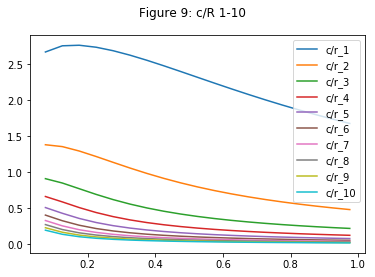

In [24]:
plt.figure()
for i in range(10):
    df_plot = df_landa(i+1)
    x = df_plot.index
    y = df_plot['c/r_{}'.format(i+1)]
    plt.plot(x,y);

plt.suptitle("Figure 9: c/R 1-10")
plt.legend()
plt.savefig('imgs/c_R.png')
plt.show()

<font size="6" color='red'>Question 10</font>

<font size="5" color='blue'>Correct Alpha</font>

In [25]:
def alpha_correct(ratio, alpha):
    return alpha - 5*(1-1/math.sqrt(ratio))

In [26]:
def df_landa_correct(landa_value):
    d={}
    d["df{0}".format(landa_value)] = pd.DataFrame(ratio_array, columns=["r/R"])
    d["df{0}".format(landa_value)].set_index('r/R', inplace=True)
    
    #landa
    d["landa_{0}".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}".format(landa_value)].append(landa(landa_value,ratio_array[i]))
    d["df{0}".format(landa_value)]["landa_{0}".format(landa_value)] = d["landa_{0}".format(landa_value)]
    
    #beta
    d["landa_{0}_beta".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_beta".format(landa_value)].append(beta(d["landa_{0}".format(landa_value)][i]))
    d["df{0}".format(landa_value)]["beta_{0}".format(landa_value)] = d["landa_{0}_beta".format(landa_value)]
    
    #alpha
    alpha = best_angle
    d["landa_{0}_alpha".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_alpha".format(landa_value)].append(alpha_correct(ratio_array[i],alpha))
    d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)] = d["landa_{0}_alpha".format(landa_value)]
    
    #betapitch
    d["landa_{0}_beta_pitch".format(landa_value)] = []
    for i in range(len(ratio_array)):
        d["landa_{0}_beta_pitch".format(landa_value)].append(beta_pitch(d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["beta_{0}".format(landa_value)].tolist()[i]))
    d["df{0}".format(landa_value)]["beta_pitch_{0}".format(landa_value)] = d["landa_{0}_beta_pitch".format(landa_value)]
    
    #cl
    d["landa_{0}_cl".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_cl".format(landa_value)].append(cl_best_angle)
    d["df{0}".format(landa_value)]["cl_{0}".format(landa_value)] = d["landa_{0}_cl".format(landa_value)]
    
    #cd
    d["landa_{0}_cd".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_cd".format(landa_value)].append(cd_best_angle)
    d["df{0}".format(landa_value)]["cd_{0}".format(landa_value)] = d["landa_{0}_cd".format(landa_value)]
    
    #C/R
    d["landa_{0}_c/r".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_c/r".format(landa_value)].append(c_r(d["df{0}".format(landa_value)].index[i],d["df{0}".format(landa_value)]["cl_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["cd_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["landa_{0}".format(landa_value)].tolist()[i]))
    d["df{0}".format(landa_value)]["c/r_{0}".format(landa_value)] = d["landa_{0}_c/r".format(landa_value)]
    
    return d["df{0}".format(landa_value)]

In [27]:
df_landa_correct(7).head()

,landa_7,beta_7,alpha_7,beta_pitch_7,cl_7,cd_7,c/r_7
r/R,,,,,,,
0.075,0.525,51.779568,22.257419,29.522149,0.9314,0.0122,0.330994
0.125,0.875,37.303948,18.142136,19.161813,0.9314,0.0122,0.257012
0.175,1.225,28.555814,15.952286,12.603528,0.9314,0.0122,0.203292
0.225,1.575,22.941989,14.540926,8.401064,0.9314,0.0122,0.166036
0.275,1.925,19.102011,13.534626,5.567385,0.9314,0.0122,0.139534


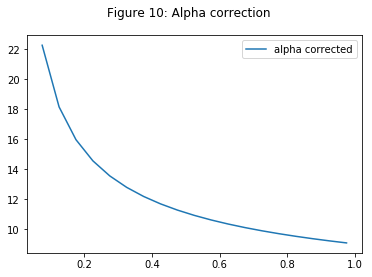

In [28]:
plt.figure()
df_plot_alpha = df_landa_correct(1)
x = df_plot_alpha.index
y = df_plot_alpha['alpha_1']
plt.plot(x,y, label='alpha corrected');
plt.suptitle("Figure 10: Alpha correction")
plt.legend()
plt.savefig('imgs/alpha_correction.png')
plt.show()

<font size="6" color='red'>Question 11</font>

<font size="5" color='blue'>c/R with interpolated values</font>

In [30]:
cl_cd_interpol = pd.read_excel('data/CL-CD-interpolation.xlsx', index_col=0)
cl_cd_interpol.head()

,CD interp,CDpoints,CL interp,CL points
alpha,,,,
1,0.007760,0.0077,0.106773,0.11
2,0.007781,0.0078,0.224528,0.22
3,0.007954,0.0080,0.333696,0.33
4,0.008278,0.0084,0.439794,0.44
5,0.008754,0.0087,0.545074,0.55


In [31]:
def df_landa_cl_cd_correct(landa_value):
    d={}
    d["df{0}".format(landa_value)] = pd.DataFrame(ratio_array, columns=["r/R"])
    d["df{0}".format(landa_value)].set_index('r/R', inplace=True)
    
    #landa
    d["landa_{0}".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}".format(landa_value)].append(landa(landa_value,ratio_array[i]))
    d["df{0}".format(landa_value)]["landa_{0}".format(landa_value)] = d["landa_{0}".format(landa_value)]
    
    #beta
    d["landa_{0}_beta".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_beta".format(landa_value)].append(beta(d["landa_{0}".format(landa_value)][i]))
    d["df{0}".format(landa_value)]["beta_{0}".format(landa_value)] = d["landa_{0}_beta".format(landa_value)]
    
    #alpha
    alpha = best_angle
    d["landa_{0}_alpha".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_alpha".format(landa_value)].append(alpha_correct(ratio_array[i],alpha))
    d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)] = d["landa_{0}_alpha".format(landa_value)]
    
    #betapitch
    d["landa_{0}_beta_pitch".format(landa_value)] = []
    for i in range(len(ratio_array)):
        d["landa_{0}_beta_pitch".format(landa_value)].append(beta_pitch(d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["beta_{0}".format(landa_value)].tolist()[i]))
    d["df{0}".format(landa_value)]["beta_pitch_{0}".format(landa_value)] = d["landa_{0}_beta_pitch".format(landa_value)]
    
    #cl
    d["landa_{0}_cl".format(landa_value)] = []
    for i in range(len(ratio_array)):
        for j in cl_cd_interpol.index:
            if int(d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)].values[i])== j:
                d["landa_{0}_cl".format(landa_value)].append((cl_cd_interpol['CL points'].values[j-1]))
    d["df{0}".format(landa_value)]["cl_{0}".format(landa_value)] = d["landa_{0}_cl".format(landa_value)]
    
    #cd
    d["landa_{0}_cd".format(landa_value)] = []
    for i in range(len(ratio_array)):
        for j in cl_cd_interpol.index:
            if int(d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)].values[i])== j:
                d["landa_{0}_cd".format(landa_value)].append((cl_cd_interpol['CDpoints'].values[j-1]))
    d["df{0}".format(landa_value)]["cd_{0}".format(landa_value)] = d["landa_{0}_cd".format(landa_value)]
    
    #C/R
    d["landa_{0}_c/r".format(landa_value)] = []
    for i in range(len(ratio_array)):
        d["landa_{0}_c/r".format(landa_value)].append(c_r(d["df{0}".format(landa_value)].index[i],d["df{0}".format(landa_value)]["cl_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["cd_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["landa_{0}".format(landa_value)].tolist()[i]))
    d["df{0}".format(landa_value)]["c/r_{0}".format(landa_value)] = d["landa_{0}_c/r".format(landa_value)]
    
    return d["df{0}".format(landa_value)]

In [32]:
df_landa_cl_cd_correct(7).head()

,landa_7,beta_7,alpha_7,beta_pitch_7,cl_7,cd_7,c/r_7
r/R,,,,,,,
0.075,0.525,51.779568,22.257419,29.522149,1.1127,0.3290,0.204783
0.125,0.875,37.303948,18.142136,19.161813,1.1383,0.2380,0.183210
0.175,1.225,28.555814,15.952286,12.603528,1.1754,0.0219,0.160610
0.225,1.575,22.941989,14.540926,8.401064,1.1813,0.0197,0.130715
0.275,1.925,19.102011,13.534626,5.567385,1.1555,0.0180,0.112376


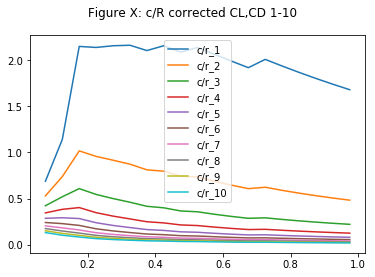

In [36]:
plt.figure()
for i in range(10):
    df_plot = df_landa_cl_cd_correct(i+1)
    x = df_plot.index
    y = df_plot['c/r_{}'.format(i+1)]
    plt.plot(x,y);
plt.suptitle("Figure X: c/R corrected CL,CD 1-10")
plt.legend()
plt.savefig('imgs/c_R_corrected_cl_cd.png')
plt.show()

<font size="6" color='red'>Question 12</font>

<font size="5" color='blue'>c/R comparison</font>

In [37]:
num = 5
num_i = 999
while num_i > alpha_deep_stall:
    num_i = best_angle - num*(1-1/math.sqrt(ratio_array[0]))
    num-=.1
print("Optimal factor =",num)

Optimal factor = 2.500000000000002


In [38]:
def alpha_correct_max(ratio, alpha):
    return alpha - num*(1-1/math.sqrt(ratio))

In [39]:
def df_landa_cl_cd_correct_alphamax(landa_value):
    d={}
    d["df{0}".format(landa_value)] = pd.DataFrame(ratio_array, columns=["r/R"])
    d["df{0}".format(landa_value)].set_index('r/R', inplace=True)
    
    #landa
    d["landa_{0}".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}".format(landa_value)].append(landa(landa_value,ratio_array[i]))
    d["df{0}".format(landa_value)]["landa_{0}".format(landa_value)] = d["landa_{0}".format(landa_value)]
    
    #beta
    d["landa_{0}_beta".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_beta".format(landa_value)].append(beta(d["landa_{0}".format(landa_value)][i]))
    d["df{0}".format(landa_value)]["beta_{0}".format(landa_value)] = d["landa_{0}_beta".format(landa_value)]
    
    #alpha
    alpha = best_angle
    d["landa_{0}_alpha".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_alpha".format(landa_value)].append(alpha_correct_max(ratio_array[i],alpha))
    d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)] = d["landa_{0}_alpha".format(landa_value)]
    
    #betapitch
    d["landa_{0}_beta_pitch".format(landa_value)] = []
    for i in range(len(ratio_array)):
        d["landa_{0}_beta_pitch".format(landa_value)].append(beta_pitch(d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["beta_{0}".format(landa_value)].tolist()[i]))
    d["df{0}".format(landa_value)]["beta_pitch_{0}".format(landa_value)] = d["landa_{0}_beta_pitch".format(landa_value)]
    
    #cl
    d["landa_{0}_cl".format(landa_value)] = []
    for i in range(len(ratio_array)):
        for j in cl_cd_interpol.index:
            if int(d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)].values[i])== j:
                d["landa_{0}_cl".format(landa_value)].append((cl_cd_interpol['CL points'].values[j-1]))
    d["df{0}".format(landa_value)]["cl_{0}".format(landa_value)] = d["landa_{0}_cl".format(landa_value)]
    
    #cd
    d["landa_{0}_cd".format(landa_value)] = []
    for i in range(len(ratio_array)):
        for j in cl_cd_interpol.index:
            if int(d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)].values[i])== j:
                d["landa_{0}_cd".format(landa_value)].append((cl_cd_interpol['CDpoints'].values[j-1]))
    d["df{0}".format(landa_value)]["cd_{0}".format(landa_value)] = d["landa_{0}_cd".format(landa_value)]
    
    #C/R
    d["landa_{0}_c/r".format(landa_value)] = []
    for i in range(len(ratio_array)):
        d["landa_{0}_c/r".format(landa_value)].append(c_r(d["df{0}".format(landa_value)].index[i],d["df{0}".format(landa_value)]["cl_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["cd_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["landa_{0}".format(landa_value)].tolist()[i]))
    d["df{0}".format(landa_value)]["c/r_{0}".format(landa_value)] = d["landa_{0}_c/r".format(landa_value)]
    
    return d["df{0}".format(landa_value)]

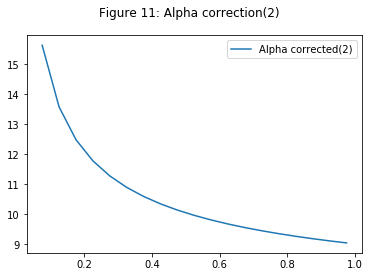

In [40]:
plt.figure()
df_plot_alpha = df_landa_cl_cd_correct_alphamax(1)
x = df_plot_alpha.index
y = df_plot_alpha['alpha_1']
plt.plot(x,y, label='Alpha corrected(2)');
plt.suptitle("Figure 11: Alpha correction(2)")
plt.legend()
plt.savefig('imgs/alpha_correction_2.png')
plt.show()

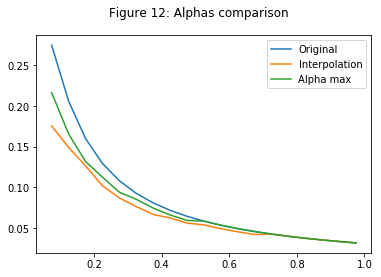

In [41]:
df_comparison_original = df_landa(8)
df_comparison_cl_cd_interpol = df_landa_cl_cd_correct(8)
df_comparison_cl_cd_interpol_alphamax = df_landa_cl_cd_correct_alphamax(8)
plt.figure()
x = df_plot_alpha.index
y1 = df_comparison_original['c/r_8']
y2 = df_comparison_cl_cd_interpol['c/r_8']
y3 = df_comparison_cl_cd_interpol_alphamax['c/r_8']
plt.plot(x,y1, label='Original')
plt.plot(x,y2, label='Interpolation')
plt.plot(x,y3, label='Alpha max')
plt.suptitle("Figure 12: Alphas comparison")
plt.legend()
plt.savefig('imgs/alphas_comparison.png')
plt.show()

<font size="6" color='red'>Question 13</font>

<font size="5" color='blue'>Percentage of therotor disk</font>

In [42]:
coeff_mul = {}
idx = []
for i in range(10):
    df_original = df_landa_cl_cd_correct_alphamax(i+1)
    coeff_mul["{0}".format(i+1)]=df_original["c/r_{0}".format(i+1)].mul((df_original["beta_pitch_{0}".format(i+1)]).apply(lambda x: math.cos(math.radians(x)))).sum()
df_coeff_mul = pd.DataFrame(coeff_mul, index=['sum'])
df_coeff_mul = df_coeff_mul.T
df_coeff_mul['Blade surface'] = df_coeff_mul['sum'].apply(lambda x: x*15/math.pi)
df_coeff_mul.drop('sum', axis=1, inplace=True)
df_coeff_mul['log'] = df_coeff_mul['Blade surface'].apply(lambda x: math.log10(x))
df_coeff_mul

,Blade surface,log
1,132.533463,2.122326
2,58.770982,1.769163
3,33.007433,1.518612
4,21.179349,1.325913
5,14.764554,1.169220
6,10.887174,1.036915
7,8.359696,0.922190
8,6.618338,0.820749
9,5.366817,0.729717
10,4.436926,0.647082


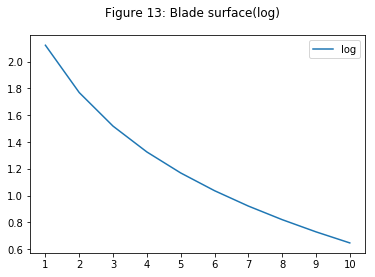

In [43]:
plt.figure()
plt.plot(df_coeff_mul['log']);
plt.suptitle("Figure 13: Blade surface(log)")
plt.legend()
plt.savefig('imgs/blade_surface.png')
plt.show()

In [44]:
#useful for later
radius = 45
rotor_disk_surface = math.pi*radius

<font size="6" color='red'>Question 14</font>

<font size="5" color='blue'>Coefficient as function of lambda</font>

In [45]:
def ct(ratio):
    return ratio*(1/3)*(2/3)

In [46]:
def cm(ratio, landa, beta, cl, cd, cr):
    return ((4/9+(landa**2))*((cl*math.sin(math.radians(beta)))-(cd*math.cos(math.radians(beta)))*cr*ratio))

In [47]:
def df_landa_cl_cd_correct_alphamax_coefficients(landa_value):
    d={}
    d["df{0}".format(landa_value)] = pd.DataFrame(ratio_array, columns=["r/R"])
    d["df{0}".format(landa_value)].set_index('r/R', inplace=True)
    
    #landa
    d["landa_{0}".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}".format(landa_value)].append(landa(landa_value,ratio_array[i]))
    d["df{0}".format(landa_value)]["landa_{0}".format(landa_value)] = d["landa_{0}".format(landa_value)]
    
    #beta
    d["landa_{0}_beta".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_beta".format(landa_value)].append(beta(d["landa_{0}".format(landa_value)][i]))
    d["df{0}".format(landa_value)]["beta_{0}".format(landa_value)] = d["landa_{0}_beta".format(landa_value)]
    
    #alpha
    alpha = best_angle
    d["landa_{0}_alpha".format(landa_value)] = []
    for i in range(len(ratio_array)):
         d["landa_{0}_alpha".format(landa_value)].append(alpha_correct_max(ratio_array[i],alpha))
    d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)] = d["landa_{0}_alpha".format(landa_value)]
    
    #betapitch
    d["landa_{0}_beta_pitch".format(landa_value)] = []
    for i in range(len(ratio_array)):
        d["landa_{0}_beta_pitch".format(landa_value)].append(beta_pitch(d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["beta_{0}".format(landa_value)].tolist()[i]))
    d["df{0}".format(landa_value)]["beta_pitch_{0}".format(landa_value)] = d["landa_{0}_beta_pitch".format(landa_value)]
    
    #cl
    d["landa_{0}_cl".format(landa_value)] = []
    for i in range(len(ratio_array)):
        for j in cl_cd_interpol.index:
            if int(d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)].values[i])== j:
                d["landa_{0}_cl".format(landa_value)].append((cl_cd_interpol['CL points'].values[j-1]))
    d["df{0}".format(landa_value)]["cl_{0}".format(landa_value)] = d["landa_{0}_cl".format(landa_value)]
    
    #cd
    d["landa_{0}_cd".format(landa_value)] = []
    for i in range(len(ratio_array)):
        for j in cl_cd_interpol.index:
            if int(d["df{0}".format(landa_value)]["alpha_{0}".format(landa_value)].values[i])== j:
                d["landa_{0}_cd".format(landa_value)].append((cl_cd_interpol['CDpoints'].values[j-1]))
    d["df{0}".format(landa_value)]["cd_{0}".format(landa_value)] = d["landa_{0}_cd".format(landa_value)]
    
    #C/R
    d["landa_{0}_c/r".format(landa_value)] = []
    for i in range(len(ratio_array)):
        d["landa_{0}_c/r".format(landa_value)].append(c_r(d["df{0}".format(landa_value)].index[i],d["df{0}".format(landa_value)]["cl_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["cd_{0}".format(landa_value)].tolist()[i],d["df{0}".format(landa_value)]["landa_{0}".format(landa_value)].tolist()[i]))
    d["df{0}".format(landa_value)]["c/r_{0}".format(landa_value)] = d["landa_{0}_c/r".format(landa_value)]
    
    #Ct
    d["landa_{0}_ct".format(landa_value)] = []
    for i in range(len(ratio_array)):
        d["landa_{0}_ct".format(landa_value)].append(ct(ratio_array[i]))
    d["df{0}".format(landa_value)]["ct_{0}".format(landa_value)] = d["landa_{0}_ct".format(landa_value)]
    
    #Cm
    d["landa_{0}_cm".format(landa_value)] = []
    for i in range(len(ratio_array)):
        d["landa_{0}_cm".format(landa_value)].append(cm(ratio_array[i], d["df{0}".format(landa_value)]["landa_{0}".format(landa_value)].tolist()[i], d["df{0}".format(landa_value)]["beta_{0}".format(landa_value)].tolist()[i], d["df{0}".format(landa_value)]["cl_{0}".format(landa_value)].tolist()[i], d["df{0}".format(landa_value)]["cd_{0}".format(landa_value)].tolist()[i], d["df{0}".format(landa_value)]["c/r_{0}".format(landa_value)].tolist()[i]))
    d["df{0}".format(landa_value)]["cm_{0}".format(landa_value)] = d["landa_{0}_cm".format(landa_value)]

    
    return d["df{0}".format(landa_value)]

In [48]:
df_landa_cl_cd_correct_alphamax_coefficients(1).head()

,landa_1,beta_1,alpha_1,beta_pitch_1,cl_1,cd_1,c/r_1,ct_1,cm_1
r/R,,,,,,,,,
0.075,0.075,83.581213,15.628709,67.952504,1.1754,0.0219,2.025464,0.016667,0.525528
0.125,0.125,79.380345,13.571068,65.809277,1.1555,0.0180,2.193126,0.027778,0.522087
0.175,0.175,75.291696,12.476143,62.815553,1.1296,0.0163,2.266535,0.038889,0.518273
0.225,0.225,71.350461,11.770463,59.579998,1.0704,0.0149,2.373964,0.050000,0.500837
0.275,0.275,67.583853,11.267313,56.316540,1.0704,0.0149,2.333005,0.061111,0.512723


In [49]:
df_coefficients = pd.DataFrame(columns=['landa','Ct','Cm','Cp'])
for i in range(10):
    df_int = df_landa_cl_cd_correct_alphamax_coefficients(i+1)
    landa_int = i+1
    ct_int = df_int["ct_{0}".format(i+1)].sum()*8*slice_radius
    cm_int = df_int["cm_{0}".format(i+1)].sum()*slice_radius*blade_number/math.pi
    cp_int = cm_int*(i+1)
    df_coefficients.loc[df_coefficients.shape[0]] = [landa_int, ct_int, cm_int, cp_int]
df_coefficients.set_index('landa', inplace=True)
df_coefficients

,Ct,Cm,Cp
landa,,,
1.0,0.886667,0.514840,0.514840
2.0,0.886667,0.750268,1.500536
3.0,0.886667,1.019457,3.058371
4.0,0.886667,1.302327,5.209308
5.0,0.886667,1.592150,7.960748
6.0,0.886667,1.886019,11.316115
7.0,0.886667,2.182464,15.277250
8.0,0.886667,2.480655,19.845242
9.0,0.886667,2.780086,25.020774


<font size="6" color='red'>Question 15</font>

<font size="5" color='blue'>Lif Drag Ratio(CL/CD)</font>

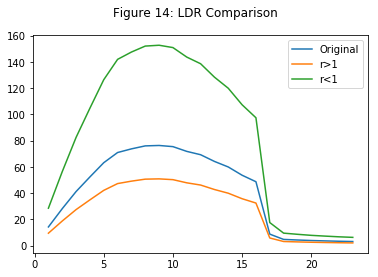

In [50]:
plt.figure()
plt.plot((cl_cd_interpol['CL points']/cl_cd_interpol['CDpoints']), label='Original')
plt.plot((cl_cd_interpol['CL points']/(cl_cd_interpol['CDpoints']*1.5)), label='r>1')
plt.plot((cl_cd_interpol['CL points']/(cl_cd_interpol['CDpoints']*.5)), label='r<1')
plt.suptitle("Figure 14: LDR Comparison")
plt.legend()
plt.savefig('imgs/ldr_comparison.png')
plt.show()

<font size="6" color='red'>Part 2</font>

<font size="5" color='blue'>Data</font>

In [51]:
prod = pd.read_csv('data/part_2.csv', index_col=0)
prod

,hours k=2,hours k=4
V0 m/s,,
2,173,0
3,318,36
4,451,131
5,556,291
6,618,524
7,650,815
8,654,1056
9,622,1194
10,570,1130


<font size="6" color='red'>Question 1</font>

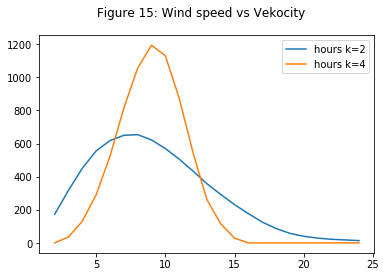

In [52]:
plt.figure()
plt.plot(prod['hours k=2'])
plt.plot(prod['hours k=4'])
plt.suptitle("Figure 15: Wind speed vs Vekocity")
plt.legend()
plt.savefig('imgs/wind_velocity.png')
plt.show()

In [53]:
df_percentage= pd.DataFrame(columns=['k','Percentage'])
df_percentage.loc[df_percentage.shape[0]] = ["hours k=2", prod['hours k=2'].sum()/(365*24)*100]
df_percentage.loc[df_percentage.shape[0]] = ["hours k=4", prod['hours k=4'].sum()/(365*24)*100]
df_percentage

,k,Percentage
0,hours k=2,79.965753
1,hours k=4,79.954338


<font size="6" color='red'>Question 2</font>

<font size="5" color='blue'>Power</font>

In [54]:
rho = 1.2

In [55]:
power = []
for velocity in prod.index:
    power.append(.5*rho*velocity**3/1000)
prod['power']=power
prod.head()

,hours k=2,hours k=4,power
V0 m/s,,,
2,173,0,0.0048
3,318,36,0.0162
4,451,131,0.0384
5,556,291,0.0750
6,618,524,0.1296


<font size="5" color='blue'>Energy</font>

In [56]:
energy_k2 = []
for i in range(len(prod)):
    energy_k2.append(prod['hours k=2'].tolist()[i]*prod['power'].tolist()[i])
prod['energy_k2']=energy_k2

energy_k4 = []
for i in range(len(prod)):
    energy_k4.append(prod['hours k=4'].tolist()[i]*prod['power'].tolist()[i])
prod['energy_k4']=energy_k4

prod.head()

,hours k=2,hours k=4,power,energy_k2,energy_k4
V0 m/s,,,,,
2,173,0,0.0048,0.8304,0.0000
3,318,36,0.0162,5.1516,0.5832
4,451,131,0.0384,17.3184,5.0304
5,556,291,0.0750,41.7000,21.8250
6,618,524,0.1296,80.0928,67.9104


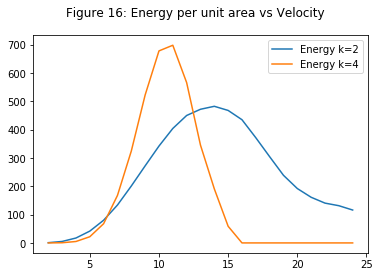

In [57]:
plt.figure()
plt.plot(prod['energy_k2'], label='Energy k=2')
plt.plot(prod['energy_k4'], label='Energy k=4')
plt.suptitle("Figure 16: Energy per unit area vs Velocity")
plt.legend()
plt.savefig('imgs/energy_velocity.png')
plt.show()

<font size="6" color='red'>Question 3</font>

<font size="5" color='blue'>Energy Cummulative</font>

In [58]:
prod['energy_k2_cumsum'] = prod['energy_k2'].cumsum()
prod['energy_k4_cumsum'] = prod['energy_k4'].cumsum()
prod.head()

,hours k=2,hours k=4,power,energy_k2,energy_k4,energy_k2_cumsum,energy_k4_cumsum
V0 m/s,,,,,,,
2,173,0,0.0048,0.8304,0.0000,0.8304,0.0000
3,318,36,0.0162,5.1516,0.5832,5.9820,0.5832
4,451,131,0.0384,17.3184,5.0304,23.3004,5.6136
5,556,291,0.0750,41.7000,21.8250,65.0004,27.4386
6,618,524,0.1296,80.0928,67.9104,145.0932,95.3490


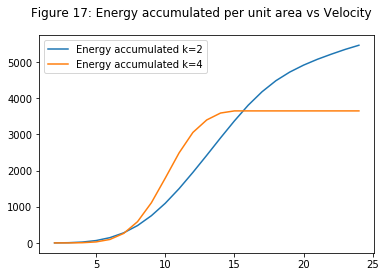

In [59]:
plt.figure()
plt.plot(prod['energy_k2_cumsum'], label='Energy accumulated k=2')
plt.plot(prod['energy_k4_cumsum'], label='Energy accumulated k=4')
plt.suptitle("Figure 17: Energy accumulated per unit area vs Velocity")
plt.legend()
plt.savefig('imgs/energy_accumulated_velocity.png')
plt.show()

<font size="6" color='red'>Question 4</font>

<font size="5" color='blue'>Ep</font>

In [60]:
cp = 1

In [61]:
def ep(k):
    d={}
    d["ep_k{0}".format(k)] = []
    for i in range(len(prod)):
                       d["ep_k{0}".format(k)].append(prod['energy_k{0}_cumsum'.format(k)].tolist()[i]+prod['power'].tolist()[i]*(prod['hours k={0}'.format(k)][(i+1):].sum()))
    return d["ep_k{0}".format(k)]

In [62]:
prod['ep_k2'] = ep(2)
prod['ep_k2_%'] = ep(2)/max(ep(2))*100
prod['ep_k4'] = ep(4)
prod['ep_k4_%'] = ep(4)/max(ep(4))*100
prod.head()

,hours k=2,hours k=4,power,energy_k2,energy_k4,energy_k2_cumsum,energy_k4_cumsum,ep_k2,ep_k2_%,ep_k4,ep_k4_%
V0 m/s,,,,,,,,,,,
2,173,0,0.0048,0.8304,0.0000,0.8304,0.0000,33.6240,0.615740,33.6192,0.921862
3,318,36,0.0162,5.1516,0.5832,5.9820,0.5832,111.5088,2.042007,113.4648,3.111284
4,451,131,0.0384,17.3184,5.0304,23.3004,5.6136,256.1196,4.690195,268.1544,7.352982
5,556,291,0.0750,41.7000,21.8250,65.0004,27.4386,478.0254,8.753849,518.3886,14.214579
6,618,524,0.1296,80.0928,67.9104,145.0932,95.3490,778.7076,14.260098,875.8002,24.015055


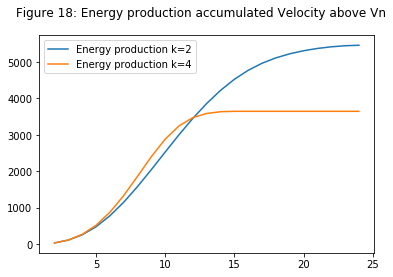

In [63]:
plt.figure()
plt.plot(prod['ep_k2'], label='Energy production k=2')
plt.plot(prod['ep_k4'], label='Energy production k=4')
plt.suptitle("Figure 18: Energy production accumulated Velocity above Vn")
plt.legend()
plt.savefig('imgs/energy_production.png')
plt.show()

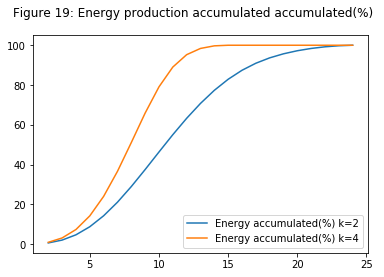

In [64]:
plt.figure()
plt.plot(prod['ep_k2_%'], label='Energy accumulated(%) k=2')
plt.plot(prod['ep_k4_%'], label='Energy accumulated(%) k=4')
plt.suptitle("Figure 19: Energy production accumulated accumulated(%) ")
plt.legend()
plt.savefig('imgs/energy_production_percetnage.png')
plt.show()

<font size="6" color='red'>Question 5</font>

<font size="5" color='blue'>Energy 24/7</font>

In [65]:
prod['E_24/7'] = prod['power']*(24*365)
prod.head()

,hours k=2,hours k=4,power,energy_k2,energy_k4,energy_k2_cumsum,energy_k4_cumsum,ep_k2,ep_k2_%,ep_k4,ep_k4_%,E_24/7
V0 m/s,,,,,,,,,,,,
2,173,0,0.0048,0.8304,0.0000,0.8304,0.0000,33.6240,0.615740,33.6192,0.921862,42.048
3,318,36,0.0162,5.1516,0.5832,5.9820,0.5832,111.5088,2.042007,113.4648,3.111284,141.912
4,451,131,0.0384,17.3184,5.0304,23.3004,5.6136,256.1196,4.690195,268.1544,7.352982,336.384
5,556,291,0.0750,41.7000,21.8250,65.0004,27.4386,478.0254,8.753849,518.3886,14.214579,657.000
6,618,524,0.1296,80.0928,67.9104,145.0932,95.3490,778.7076,14.260098,875.8002,24.015055,1135.296


In [66]:
prod['LF_k2'] = prod['ep_k2']/prod['E_24/7']
prod['LF_k4'] = prod['ep_k4']/prod['E_24/7']
prod.head()

,hours k=2,hours k=4,power,energy_k2,energy_k4,energy_k2_cumsum,energy_k4_cumsum,ep_k2,ep_k2_%,ep_k4,ep_k4_%,E_24/7,LF_k2,LF_k4
V0 m/s,,,,,,,,,,,,,,
2,173,0,0.0048,0.8304,0.0000,0.8304,0.0000,33.6240,0.615740,33.6192,0.921862,42.048,0.799658,0.799543
3,318,36,0.0162,5.1516,0.5832,5.9820,0.5832,111.5088,2.042007,113.4648,3.111284,141.912,0.785760,0.799543
4,451,131,0.0384,17.3184,5.0304,23.3004,5.6136,256.1196,4.690195,268.1544,7.352982,336.384,0.761391,0.797168
5,556,291,0.0750,41.7000,21.8250,65.0004,27.4386,478.0254,8.753849,518.3886,14.214579,657.000,0.727588,0.789024
6,618,524,0.1296,80.0928,67.9104,145.0932,95.3490,778.7076,14.260098,875.8002,24.015055,1135.296,0.685907,0.771429


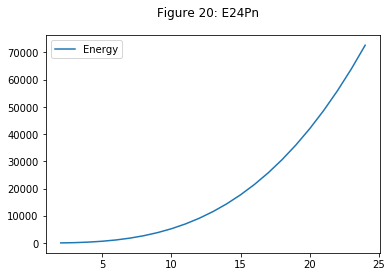

In [67]:
plt.figure()
plt.plot(prod['E_24/7'], label='Energy')
plt.suptitle("Figure 20: E24Pn")
plt.legend()
plt.savefig('imgs/e24_pn.png')
plt.show()

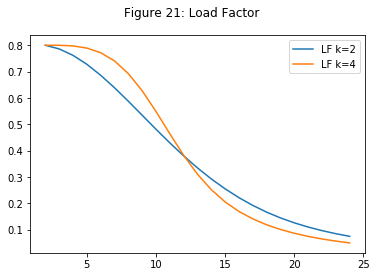

In [68]:
plt.figure()
plt.plot(prod['LF_k2'], label='LF k=2')
plt.plot(prod['LF_k4'], label='LF k=4')
plt.suptitle("Figure 21: Load Factor")
plt.legend()
plt.savefig('imgs/load_factor.png')
plt.show()

<font size="6" color='red'>Question 6</font>

In [69]:
vn_k2 = 16
vn_k4 = 12

<font size="6" color='red'>Question 7</font>

In [71]:
landa_cp = pd.read_csv('data/landa_cp.csv', index_col=0)
landa_cp.T

landa r,1,2,3,4,5,6,7,8,9,10,11,12
CP,0.0,0.004,0.056,0.174,0.304,0.4,0.44,0.424,0.36,0.258,0.127,-0.024


In [72]:
landa_r = 7

cp_k4 = landa_cp.iloc[landa_r-1][0]
power_k4 = 2.5
radius_k4 = math.sqrt(2*power_k4*1000000/(1.2*math.pi*vn_k4**3*cp_k4))
omega_rad_s_k4 = landa_r*vn_k4/radius_k4
omega_rpm_k4 = omega_rad_s_k4/(2*math.pi/60)

cp_k2 = landa_cp.iloc[landa_r-1][0]
radius_k2 = radius_k4
power_k2 = 0.5*1.2*radius_k2**2*math.pi*vn_k2**3*cp_k2/1000000
omega_rad_s_k2 = landa_r*vn_k2/radius_k2
omega_rpm_k2 = omega_rad_s_k2/(2*math.pi/60)

df_rpm= pd.DataFrame(columns=['k','Radius','Power','Omega(r/s)', 'Omega(rpm)'])
df_rpm.loc[df_rpm.shape[0]] = ["hours k=2", radius_k2, power_k2, omega_rad_s_k2, omega_rpm_k2]
df_rpm.loc[df_rpm.shape[0]] = ["hours k=4", radius_k4, power_k4, omega_rad_s_k4, omega_rpm_k4]
df_rpm

,k,Radius,Power,Omega(r/s),Omega(rpm)
0,hours k=2,41.765841,5.925926,2.681617,25.607558
1,hours k=4,41.765841,2.500000,2.011213,19.205669


<font size="6" color='red'>Question 8</font>

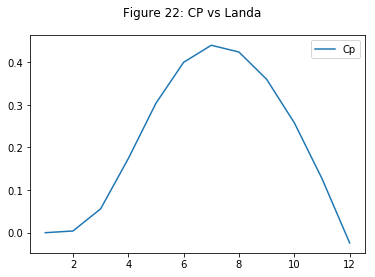

In [73]:
plt.figure()
plt.plot(landa_cp, label='Cp')
plt.suptitle("Figure 22: CP vs Landa")
plt.legend()
plt.savefig('imgs/cp_landa.png')
plt.show()

<font size="6" color='red'>Question 9</font>

In [74]:
def omega_rpm(landa,velocity,radius):
    return (landa*velocity/radius)/(2*math.pi/60)

In [75]:
def velocity_calc(radius,velocity,cp):
    return 0.5*1.2*radius**2*math.pi*velocity**3*cp/1000000

In [76]:
def df_landa_velocities(vel):
    d={}
    d["df{0}".format(vel)] = pd.DataFrame([landa_cp.index,landa_cp['CP']])    
    d["df{0}".format(vel)] = d["df{0}".format(vel)].T
    d["df{0}".format(vel)].columns = ['landa','CP']
    d["df{0}".format(vel)].set_index('landa', inplace=True)
    
    #omega
    d["omega_{0}".format(vel)] = []
    for i in d["df{0}".format(vel)].index:
         d["omega_{0}".format(vel)].append(omega_rpm(i, vel, radius_k2))
    d["df{0}".format(vel)]["omega_{0}".format(vel)] = d["omega_{0}".format(vel)]

    #velocity
    d["velocity_{0}".format(vel)] = []
    for i in d["df{0}".format(vel)].index:
         d["velocity_{0}".format(vel)].append(velocity_calc(radius_k2, vel, float(d["df{0}".format(vel)]['CP'][i])))
    d["df{0}".format(vel)]["velocity_{0}".format(vel)] = d["velocity_{0}".format(vel)]
    
    return d["df{0}".format(vel)]

In [77]:
df_landa_velocities(4).T

landa,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
CP,0.000000,0.004000,0.056000,0.174000,0.304000,0.400000,0.440000,0.424000,0.360000,0.258000,0.127000,-0.024000
omega_4,0.914556,1.829111,2.743667,3.658223,4.572778,5.487334,6.401890,7.316445,8.231001,9.145557,10.060112,10.974668
velocity_4,0.000000,0.000842,0.011785,0.036616,0.063973,0.084175,0.092593,0.089226,0.075758,0.054293,0.026726,-0.005051


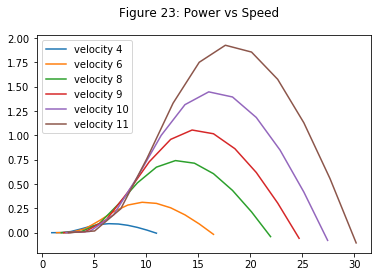

In [78]:
velocities = [4,6,8,9,10,11]
plt.figure()
for i in velocities:
    df_int = df_landa_velocities(i)
    x = df_int['omega_{0}'.format(i)]
    y = df_int['velocity_{0}'.format(i)]
    plt.plot(x,y, label='velocity {0}'.format(i))
plt.suptitle("Figure 23: Power vs Speed")
plt.legend()
plt.savefig('imgs/power_speed.png')
plt.show()

<font size="6" color='red'>Question 10</font>

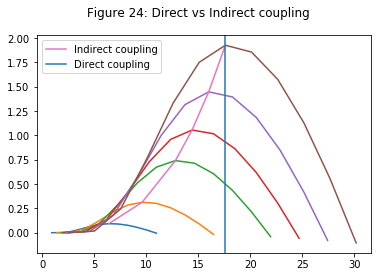

In [79]:
velocities = [4,6,8,9,10,11]
indirect_coupling_index = []
indirect_coupling_values = []
direct_coupling = 0
direct_coupling_index = 0
plt.figure()
for i in velocities:
    df_int = df_landa_velocities(i)
    df_int['velocity_{0}'.format(i)]
    indirect_coupling_values.append(df_landa_velocities(i)['velocity_{0}'.format(i)].max())
    indirect_coupling_index.append(df_landa_velocities(i)['omega_{0}'.format(i)][df_landa_velocities(i)['velocity_{0}'.format(i)].idxmax()])
    if df_landa_velocities(i)['velocity_{0}'.format(i)].max() > direct_coupling:
        direct_coupling = df_landa_velocities(i)['velocity_{0}'.format(i)].max()
        direct_coupling_index = df_landa_velocities(i)['omega_{0}'.format(i)][df_landa_velocities(i)['velocity_{0}'.format(i)].idxmax()]
    x = df_int['omega_{0}'.format(i)]
    y = df_int['velocity_{0}'.format(i)]
    plt.plot(x,y, label = '')
plt.plot(indirect_coupling_index, indirect_coupling_values, label='Indirect coupling')
plt.axvline(x=direct_coupling_index, label='Direct coupling')
plt.suptitle("Figure 24: Direct vs Indirect coupling")
plt.legend()
plt.savefig('imgs/couplings.png')
plt.show()

<font size="6" color='red'>Question 12</font>

In [80]:
def condition(x,y):
    if(x>cut_in_speed and x<cut_out_speed):
        return 1/2*density*math.pi*radius**2*(x if x<vn_k2 else vn_k2)**3*y*cp/10**6
    else:
        return 0

In [83]:
density = 1.2
cut_in_speed = 4.5
cut_out_speed = 25

prod_2 = pd.read_csv('data/part_2.csv', index_col=0)

production_2_k2 = []
for i in range(len(prod_2)):
    production_2_k2.append(condition(prod_2.index[i],prod_2['hours k=2'].values[i]))
prod_2['Energy produced k=2']=production_2_k2

production_2_k4 = []
for i in range(len(prod_2)):
    production_2_k4.append(condition(prod_2.index[i],prod_2['hours k=4'].values[i]))
prod_2['Energy produced k=4']=production_2_k4

    
prod_2.head()

,hours k=2,hours k=4,Energy produced k=2,Energy produced k=4
V0 m/s,,,,
2,173,0,0.000000,0.000000
3,318,36,0.000000,0.000000
4,451,131,0.000000,0.000000
5,556,291,265.283938,138.844651
6,618,524,509.528378,432.027298


In [84]:
tot_prod_k2 = prod_2['Energy produced k=2'].sum()/10**3
avai_prod_k2 = (1/2*density*math.pi*(radius**2)*(vn_k2**3)*cp*365*24)/(10**9)
lf_k2 = tot_prod_k2/avai_prod_k2
tot_prod_k4 = prod_2['Energy produced k=4'].sum()/10**3
avai_prod_k4 = (1/2*density*math.pi*(radius**2)*(vn_k4**3)*cp*365*24)/(10**9)
lf_k4 = tot_prod_k4/avai_prod_k4

df_prod_lf = pd.DataFrame(columns=['k','Available production (GW)', 'Real production(GW)', 'LF'])
df_prod_lf.loc[df_prod_lf.shape[0]] = ['k=2',avai_prod_k2, tot_prod_k2, lf_k2]
df_prod_lf.loc[df_prod_lf.shape[0]] = ['k=4',avai_prod_k4, tot_prod_k4, lf_k4]
df_prod_lf

,k,Available production (GW),Real production(GW),LF
0,k=2,136.958883,30.218020,0.220636
1,k=4,57.779529,23.164735,0.400916


<font size="6" color='red'>Question 13</font>

In [85]:
q_prod_k2 = prod['energy_k2_cumsum'][prod['energy_k2_cumsum'].index==vn_k2].values[0]*math.pi*radius**2*cp/1000000
lf_k2_q4 = tot_prod_k4/avai_prod_k4
q_prod_k4 = prod['energy_k4_cumsum'][prod['energy_k4_cumsum'].index==vn_k4].values[0]*math.pi*radius**2*cp/1000000
lf_k4_q4 = tot_prod_k4/avai_prod_k4
df_prod_lf_q4 = pd.DataFrame(columns=['k','Available production (GW)', 'Q4 production(GW)', 'LF'])
df_prod_lf_q4.loc[df_prod_lf_q4.shape[0]] = ['k=2',avai_prod_k2, q_prod_k2, lf_k2_q4]
df_prod_lf_q4.loc[df_prod_lf_q4.shape[0]] = ['k=4',avai_prod_k4, q_prod_k4, lf_k4_q4]
df_prod_lf_q4

,k,Available production (GW),Q4 production(GW),LF
0,k=2,136.958883,24.206228,0.400916
1,k=4,57.779529,19.414738,0.400916


<font size="6" color='red'>Question 14</font>

In [86]:
df_rpm['Omega(rpm)'][df_rpm['k']=='hours k=4'].values[0]

19.205668684182374

In [87]:
landa_q14 = 12
v_cut_k2 = (df_rpm['Omega(rpm)'][df_rpm['k']=='hours k=2'].values[0]*2*math.pi/60)*radius/landa_q14
v_cut_k4 = (df_rpm['Omega(rpm)'][df_rpm['k']=='hours k=4'].values[0]*2*math.pi/60)*radius/landa_q14
df_v_cut_in = pd.DataFrame(columns=['k','Cut-in speed '])
df_v_cut_in.loc[df_v_cut_in.shape[0]] = ['k=2', v_cut_k2]
df_v_cut_in.loc[df_v_cut_in.shape[0]] = ['k=4', v_cut_k4]
df_v_cut_in

,k,Cut-in speed
0,k=2,10.056065
1,k=4,7.542048


<font size="6" color='red'>Question 15</font>

<font size="6" color='red'>Question 16</font>

In [89]:
frequency = 50
n_poles = 2
rotation = 60*frequency/n_poles

In [90]:
df_gearbox = pd.DataFrame(columns=['k','Rotation(rpm)', 'Gearbox ratio'])
df_gearbox.loc[df_gearbox.shape[0]] = ['k=2',df_rpm['Omega(rpm)'][df_rpm['k']=='hours k=2'].values[0],rotation/df_rpm['Omega(rpm)'][df_rpm['k']=='hours k=2'].values[0]]
df_gearbox.loc[df_gearbox.shape[0]] = ['k=4',df_rpm['Omega(rpm)'][df_rpm['k']=='hours k=4'].values[0],rotation/df_rpm['Omega(rpm)'][df_rpm['k']=='hours k=4'].values[0]]
df_gearbox

,k,Rotation(rpm),Gearbox ratio
0,k=2,25.607558,58.576456
1,k=4,19.205669,78.101941
